Steering Angle: -0.2876218


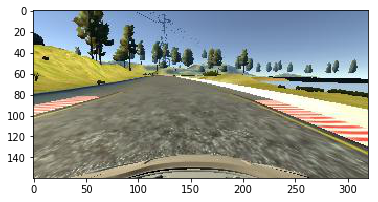

center


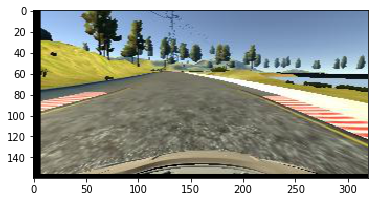

center translated
Translated Steering Angle: -0.25714235592741735


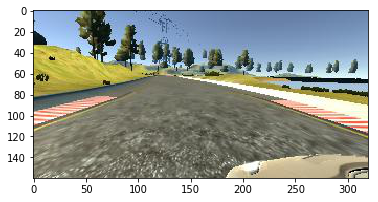

left


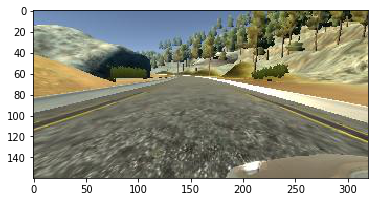

right


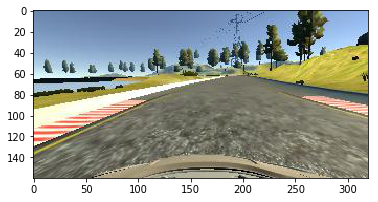

center flipped
Steering Angle: 0.0


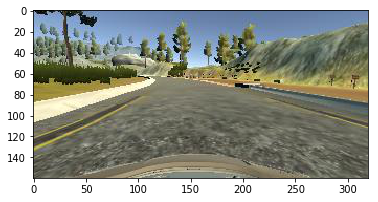

center


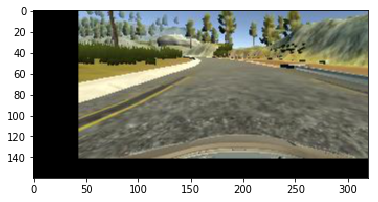

center translated
Translated Steering Angle: 0.17354949207362763


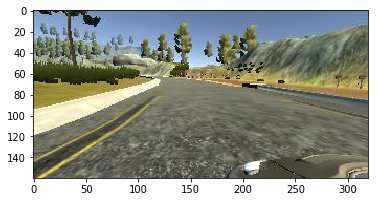

left


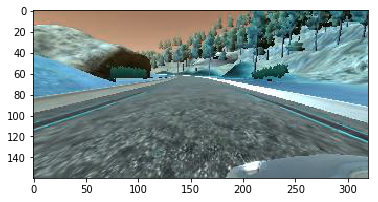

right


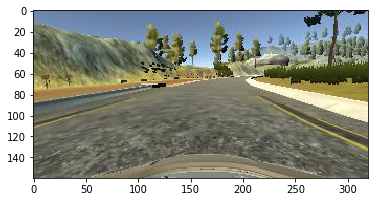

center flipped
Steering Angle: 0.0904655


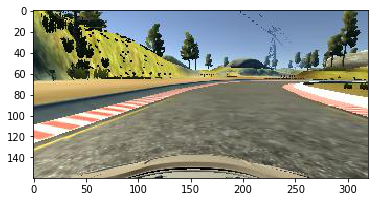

center


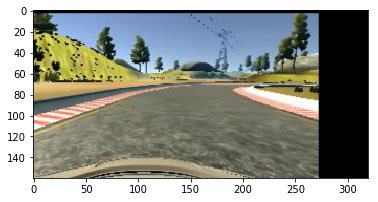

center translated
Translated Steering Angle: -0.0986641488061542


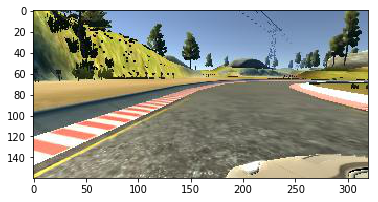

left


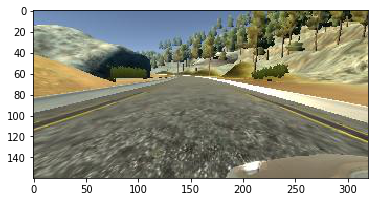

right


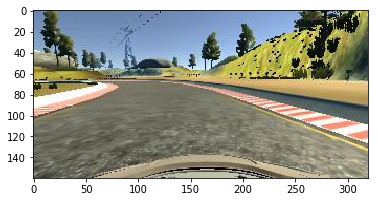

center flipped
Steering Angle: 0.0


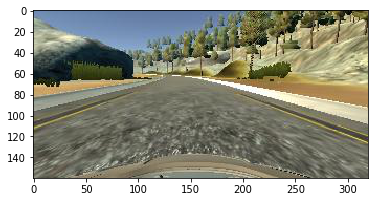

center


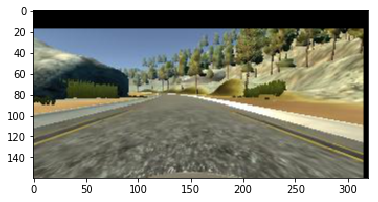

center translated
Translated Steering Angle: -0.017706755551161052


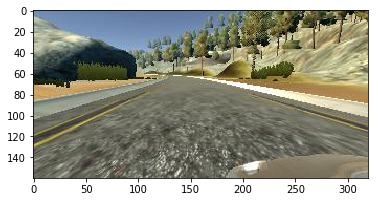

left


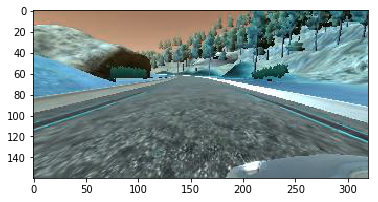

right


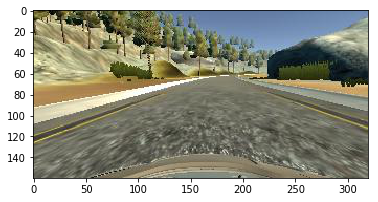

center flipped
Steering Angle: -0.107229


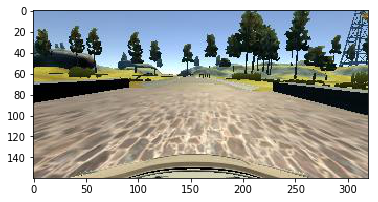

center


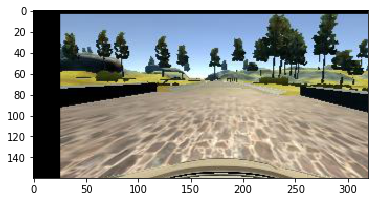

center translated
Translated Steering Angle: -0.0025215920865819808


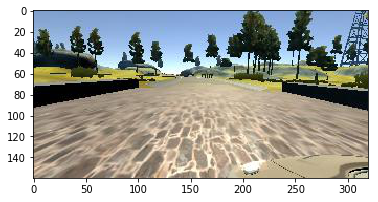

left


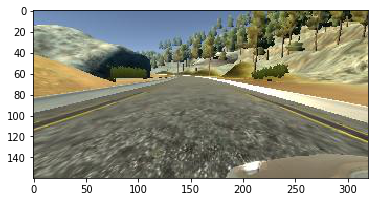

right


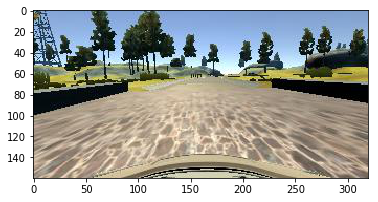

center flipped


In [29]:
%matplotlib inline

import csv
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import random

data =[]
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        data.append(line)
        
data = shuffle(data)
count = 0
correction = 0.25

def img_flip(img):
    img = cv2.flip(img,1)
    return img

def translate_img(img,angle,translate_range = 100):
    rows, cols, _ = img.shape
    translate_x = translate_range*np.random.uniform()-translate_range/2
    angle = angle + translate_x/translate_range*0.4
    translate_y = 40*np.random.uniform()-20
    Translate_Matrix = np.float32([[1,0,translate_x],[0,1,translate_y]])
    img  = cv2.warpAffine(img,Translate_Matrix,(cols,rows))
    return img,angle


for row in data:
    steering_center = float(row[3])
    if steering_center < 0.85 and random.random()<0.8:
        continue
    if count < 5:
                steering_center = float(row[3])
                steering_left = steering_center + correction
                steering_right = steering_center - correction
                img= (cv2.imread(data_directory+row[0].strip()))
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img_left = (cv2.imread(data_directory+row[1].strip()))
                img_left = cv2.cvtColor(img_left,cv2.COLOR_BGR2RGB)
                mg_right = ((cv2.imread(data_directory+row[2].strip())))
                img_right= cv2.cvtColor(img_right,cv2.COLOR_BGR2RGB)
                tr_img, tr_angle = translate_img(img, steering_center)
            
                print("Steering Angle:", steering_center)
                plt.imshow(img)
                plt.show()
                print('center')
                plt.imshow(tr_img)
                plt.show()
                print('center translated')
                print("Translated Steering Angle:", tr_angle)
                plt.imshow(img_left)
                plt.show()
                print('left')
                plt.imshow(img_right)
                plt.show()
                print('right')
                plt.imshow(img_flip(img))
                plt.show()
                print('center flipped')

                count += 1